In [44]:
### included sections for data preprocessing, analysis, and findings of the set .csv file
### this is an SDA of the vehicles_us.csv, where we'll clear duplicates, clean the dataset, and reprocess it for analysis

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('C:\\Users\\micha\\TripleTen\\Project4\\vehicles_us.csv')

In [3]:
# Dropping duplicates from dataset
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

In [4]:
# Replacing missing values with ffill
missing_values = data.isnull().sum()
print("Missing values before filling:\n", missing_values)

Missing values before filling:
 price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [5]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [10]:
#displaying info
display(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [15]:
# seperating other relevent info for more analysis
data['model_year'] = data['model_year'].fillna(data['model_year'].median())
data['odometer'] = data['odometer'].fillna(data['odometer'].median())
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].mode()[0])

# cleaning paint NaN's
missing_paint = data['paint_color'].isnull().sum()
print(f"Missing values in 'paint_color': {missing_paint}")

Missing values in 'paint_color': 9267


In [19]:
data['paint_color'] = data['paint_color'].fillna('Unknown')

In [20]:
print(data.dtypes)

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object


In [21]:
# Displaying dataset info and descriptive stats
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
               price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51525.000000   51525.000000  51525.000000   
mean    12132.464

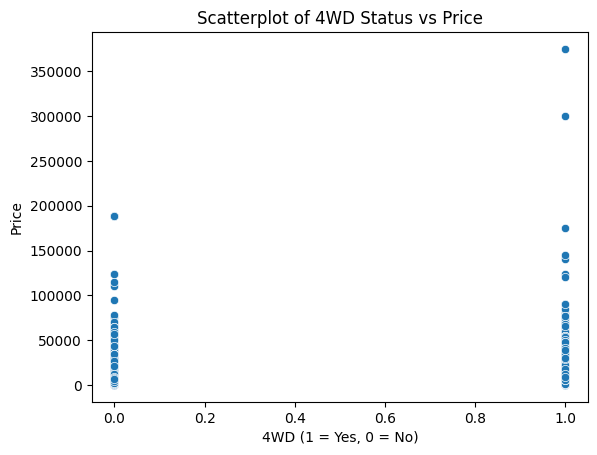

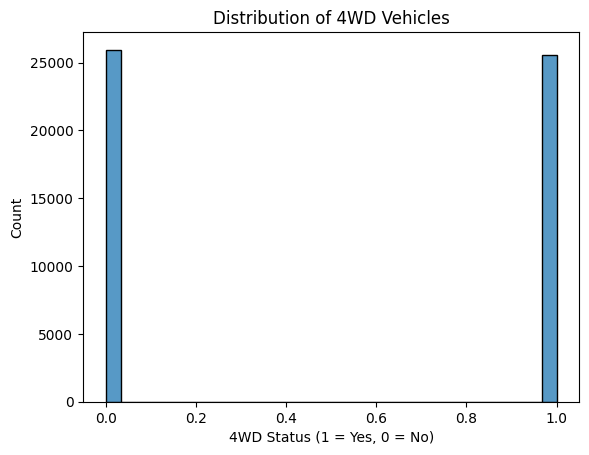

In [22]:
# Scatterplot
sns.scatterplot(data=data, x='is_4wd', y='price')
plt.title('Scatterplot of 4WD Status vs Price')
plt.xlabel('4WD (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.show()

# Histogram: Distribution of 4WD Vehicles
sns.histplot(data['is_4wd'], bins=30)
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [23]:
# Counting 4WD vs 2WD Vehicles
fourwd_counts = data['is_4wd'].value_counts()
print(fourwd_counts)

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64


In [24]:
# Creating a DataFrame for plotting
summary_df = fourwd_counts.reset_index()
summary_df.columns = ['4WD Status', 'Count']

C:\Users\micha\AppData\Local\Temp\ipykernel_7292\1579539943.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='4WD Status', y='Count', data=summary_df, palette='Set2')


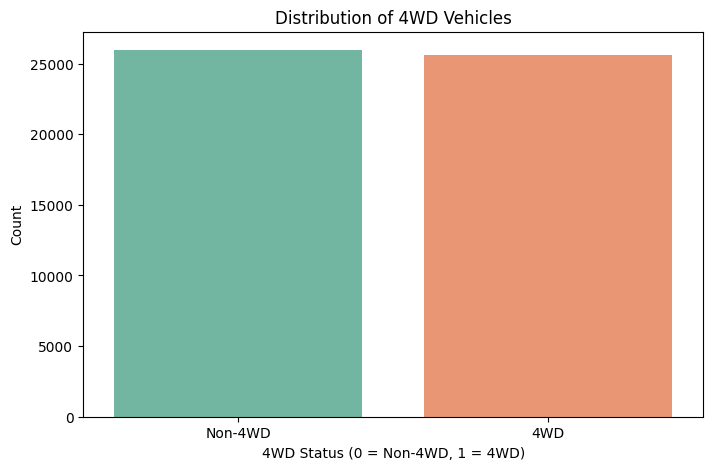

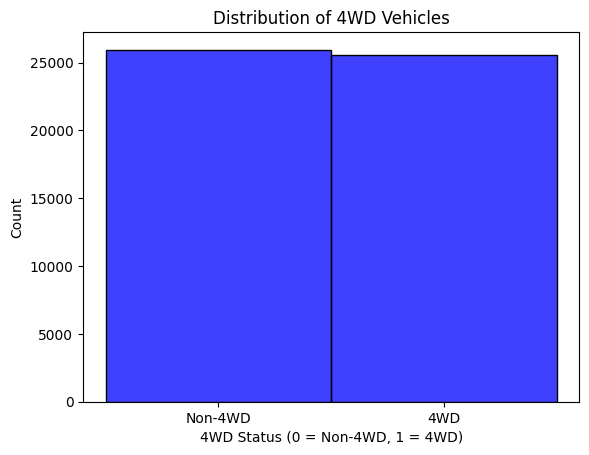

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize the 4WD distribution
fourwd_counts = data['is_4wd'].value_counts()

# Create a DataFrame for plotting
summary_df = fourwd_counts.reset_index()
summary_df.columns = ['4WD Status', 'Count']

# Create a combined bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='4WD Status', y='Count', data=summary_df, palette='Set2')
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (0 = Non-4WD, 1 = 4WD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-4WD', '4WD'])
plt.show()

sns.histplot(data['is_4wd'], bins=2, discrete=True, color='blue')  # Use bins=2 for binary data
plt.title('Distribution of 4WD Vehicles')
plt.xlabel('4WD Status (0 = Non-4WD, 1 = 4WD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-4WD', '4WD'])  # Customizing x-ticks for clarity
plt.show()

In [31]:
print("First few rows of data:\n", data.head())

# Print the column names
print("Column names in the DataFrame:\n", data.columns)

# Check the data types
print("Data types:\n", data.dtypes)

# Check if 'color' exists
if 'color' in data.columns:
    print("'paint_color' column exists.")
else:
    print("'paint_color' column does not exist.")

First few rows of data:
    price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  113000.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     Unknown     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup     Unknown     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28  
Column names in the DataFrame:
 Index(['price', 'model_year', 'model', 'condition', 'cylinde

Missing values in 'paint_color': 0
Missing values after filling:
 price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


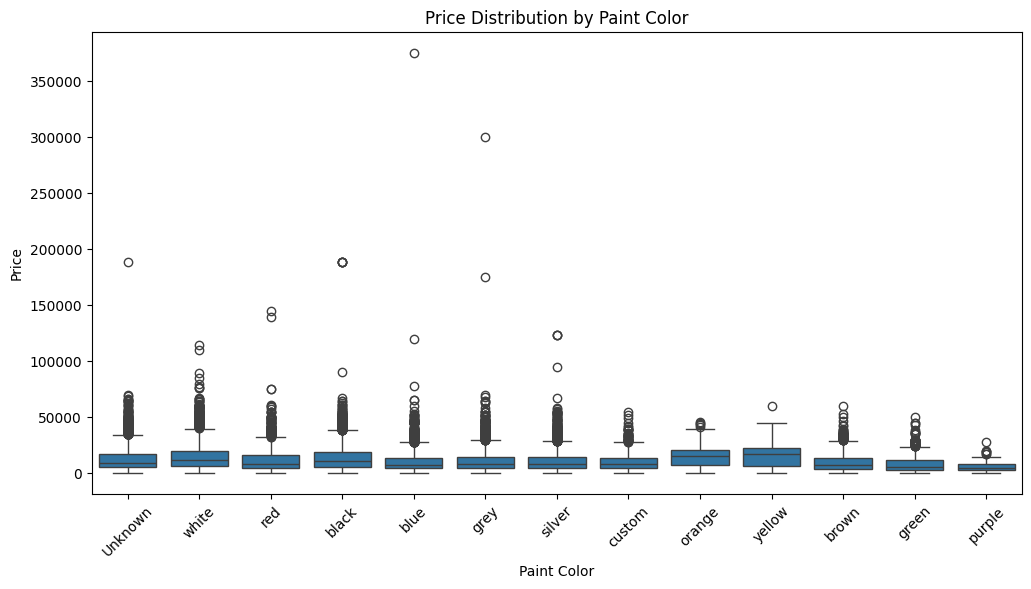

Counts of vehicles by paint color:
 paint_color
white      10029
Unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64


C:\Users\micha\AppData\Local\Temp\ipykernel_7292\4079706225.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paint_color_counts.index, y=paint_color_counts.values, palette='Set2')


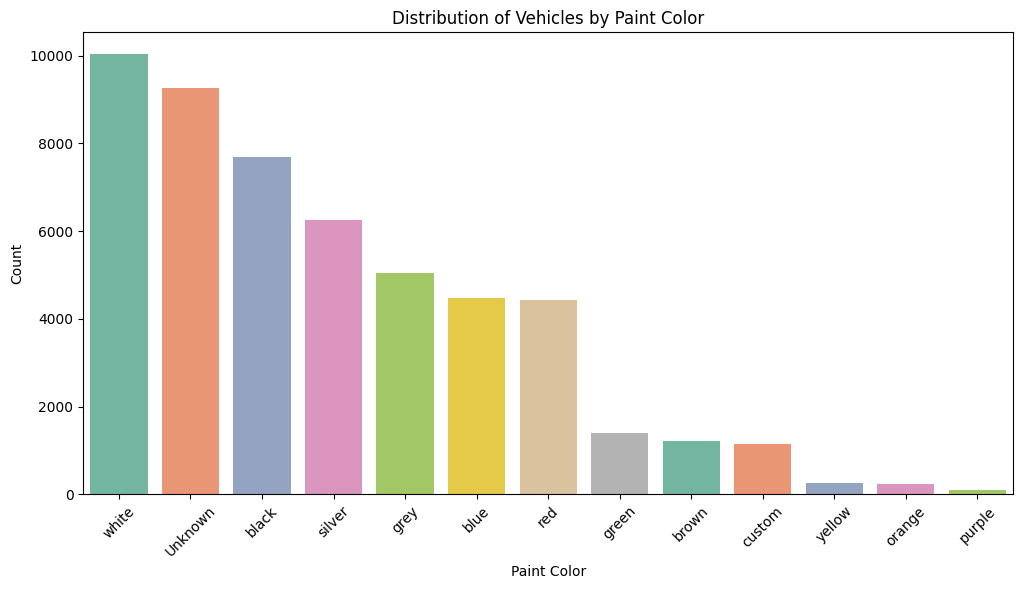

In [33]:

# Clean and convert columns
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['model_year'] = pd.to_numeric(data['model_year'], errors='coerce')
data['cylinders'] = pd.to_numeric(data['cylinders'], errors='coerce')

# Drop rows with NaN values that might have resulted from the conversion
data = data.dropna(subset=['price', 'model_year', 'cylinders'])

if 'paint_color' in data.columns:
    missing_paint_color = data['paint_color'].isnull().sum()
    print(f"Missing values in 'paint_color': {missing_paint_color}")
    
    # Fill missing values in 'paint_color'
    data['paint_color'] = data['paint_color'].fillna('Unknown')

# Check for missing values again
missing_values = data.isnull().sum()
print("Missing values after filling:\n", missing_values)

if 'paint_color' in data.columns:
    # Example: Boxplot for price distribution by paint color
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='paint_color', y='price', data=data)
    plt.title('Price Distribution by Paint Color')
    plt.xlabel('Paint Color')
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()

    # Count of vehicles by paint color
    paint_color_counts = data['paint_color'].value_counts()
    print("Counts of vehicles by paint color:\n", paint_color_counts)

    # Bar plot for the distribution of vehicles by paint color
    plt.figure(figsize=(12, 6))
    sns.barplot(x=paint_color_counts.index, y=paint_color_counts.values, palette='Set2')
    plt.title('Distribution of Vehicles by Paint Color')
    plt.xlabel('Paint Color')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()
else:
    print("'paint_color' column is not found in the DataFrame.")